<center><h1>Final Project</h1></center>
Name : Sneha Bandi
<br>github username : snehabandi
<br>USC ID : 6557-6891-44
<br><hr>

<h2><center>Part b) Data Exploration and Pre-processing</center></h2><hr>
<b> 
<br>(i) You can use binary encoding for the sentiments , i.e y=1 for positive sentiments and y=−1 for negative sentiments.
</b>
<b>
<br>ii.) The data are pretty clean. Remove the punctuation and numbers from the data</b>
<br>
<b><br>(iii)The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

warnings.filterwarnings('ignore')  # Used to avoid any warnings in the output

def train_test_split():
    pn = ['neg','pos']
    col = ["reviews", "encoding"]
    df_test = pd.DataFrame(columns=col)
    df_train = pd.DataFrame(columns=col)
    df_complete = pd.DataFrame(columns=col)
    k = 0
    j = 0
    l = 0
    for p in range(0,2):
        pos_or_neg = pn[p]
        
        if(pos_or_neg == 'pos'):
            encoding = 1
        else :
            encoding = 0
        
        i = 0
        dir_path = os.getcwd() + '\..\data\\'+pos_or_neg

        for file in os.listdir(dir_path) :
            file_path = dir_path + "\\" +file

            with open(file_path) as f:
                lines = f.readlines()

                if i<700:
                    df_train.loc[k,'reviews'] = lines 
                    df_train.loc[k,'encoding'] = encoding
                    k = k+1
                else:
                    df_test.loc[j,'reviews'] = lines 
                    df_test.loc[j,'encoding'] = encoding
                    j = j+1

                df_complete.loc[l,'reviews'] = lines 
                df_complete.loc[l,'encoding'] = encoding

                i = i+1
                l = l+1

    return df_train, df_test,df_complete

In [2]:
train_dataset, test_dataset, dataset = train_test_split()
print('\nCOMPLETE DATA : ')
display(dataset)
print('\nTRAINING DATA : ')
display(train_dataset)
print('\nTESTING DATA : ')
display(test_dataset)


COMPLETE DATA : 


,reviews,encoding
0,[plot : two teen couples go to a church party ...,0
1,"[the happy bastard's quick movie review \n, da...",0
2,[it is movies like these that make a jaded mov...,0
3,"[ "" quest for camelot "" is warner bros . ' fir...",0
4,[synopsis : a mentally unstable man undergoing...,0
...,...,...
1995,"[wow ! what a movie . \n, it's everything a mo...",1
1996,"[richard gere can be a commanding actor , but ...",1
1997,"[glory--starring matthew broderick , denzel wa...",1
1998,[steven spielberg's second epic film on world ...,1



TRAINING DATA : 


,reviews,encoding
0,[plot : two teen couples go to a church party ...,0
1,"[the happy bastard's quick movie review \n, da...",0
2,[it is movies like these that make a jaded mov...,0
3,"[ "" quest for camelot "" is warner bros . ' fir...",0
4,[synopsis : a mentally unstable man undergoing...,0
...,...,...
1395,"[who would have thought ? \n, jim carrey does ...",1
1396,[capsule : this is a harrowing look at a rarel...,1
1397,"[another 'independent film' , this comedy , wh...",1
1398,[a frequent error is the categorization of a t...,1



TESTING DATA : 


,reviews,encoding
0,"[ "" the beach "" is a structurally confusing fi...",0
1,"[the most absurd remake of 1998 ? \n, it's a t...",0
2,"[in 1990 , the surprise success an unheralded ...",0
3,"[these days , we are witnessing the deluge of ...",0
4,"[after 1993's "" falling down , "" i hoped that ...",0
...,...,...
595,"[wow ! what a movie . \n, it's everything a mo...",1
596,"[richard gere can be a commanding actor , but ...",1
597,"[glory--starring matthew broderick , denzel wa...",1
598,[steven spielberg's second epic film on world ...,1


In [3]:
import re
import string
from keras.preprocessing.text import Tokenizer


def review_to_words1( raw_review ):
    i=0
    df_tokenized = pd.DataFrame(columns=['reviews'])
    df_token_dict = pd.DataFrame(columns=['tokens'])

    for i in range(0,len(raw_review)):
        temp = str(raw_review["reviews"][i])
        letters_only = re.sub(r'[\d]|[^\w\s]',' ', temp)
        df_tokenized.loc[i,'reviews'] = letters_only

    df_tokenized['encoding'] = raw_review['encoding']
    return df_tokenized

def review_to_words( raw_review ):
    i=0
    df_tokenized = pd.DataFrame(columns=['reviews'])
    df_token_dict = pd.DataFrame(columns=['tokens'])

    for doc in raw_review["reviews"]:
        
        t = Tokenizer(
            num_words=None,
            filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890',
            lower=True,
            split=None,
            char_level=False,
            oov_token=None,
            document_count=0)
        
        t.fit_on_texts(doc)
        token_dict = t.word_counts
        tokens = list(token_dict.keys())
        df_tokenized.loc[i,'reviews'] = ' '.join(tokens)
        i=i+1

    df_tokenized['encoding'] = raw_review['encoding']
    return df_tokenized

def get_word_dict(df_tokenized):
        
    t = Tokenizer(5001)
    t.fit_on_texts(df_tokenized['reviews'])
    token_dict = t.word_counts
    
    return token_dict

In [24]:
df_tokenized_complete = review_to_words(dataset)
print('\nCOMPLETE DATA : ')
display(df_tokenized_complete)
df_tokenized_train = review_to_words(train_dataset)
print('\nTRAINING DATA : ')
display (df_tokenized_train)
df_tokenized_test = review_to_words(test_dataset)
print('\nTESTING DATA : ')
display (df_tokenized_test)

word_dict = get_word_dict(df_tokenized_complete)


COMPLETE DATA : 


,reviews,encoding
0,plot two teen couples go to a church party dri...,0
1,the happy bastard's quick movie review damn th...,0
2,it is movies like these that make a jaded movi...,0
3,quest for camelot is warner bros ' first featu...,0
4,synopsis a mentally unstable man undergoing ps...,0
...,...,...
1995,wow what a movie it's everything can be funny ...,1
1996,richard gere can be a commanding actor but he'...,1
1997,glorystarring matthew broderick denzel washing...,1
1998,steven spielberg's second epic film on world w...,1



TRAINING DATA : 


,reviews,encoding
0,plot two teen couples go to a church party dri...,0
1,the happy bastard's quick movie review damn th...,0
2,it is movies like these that make a jaded movi...,0
3,quest for camelot is warner bros ' first featu...,0
4,synopsis a mentally unstable man undergoing ps...,0
...,...,...
1395,who would have thought jim carrey does drama w...,1
1396,capsule this is a harrowing look at rarely dra...,1
1397,another 'independent film' this comedy which w...,1
1398,a frequent error is the categorization of terr...,1



TESTING DATA : 


,reviews,encoding
0,the beach is a structurally confusing film tha...,0
1,the most absurd remake of it's a toss up betwe...,0
2,in the surprise success an unheralded little m...,0
3,these days we are witnessing the deluge of fil...,0
4,after 's falling down i hoped that joel schuma...,0
...,...,...
595,wow what a movie it's everything can be funny ...,1
596,richard gere can be a commanding actor but he'...,1
597,glorystarring matthew broderick denzel washing...,1
598,steven spielberg's second epic film on world w...,1


<b>iv) Count the number of unique words in the whole dataset (train + test) and print it out.</b>

In [5]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
text_data = []
for row in df_tokenized_complete['reviews']:
    text_data.extend(row.split(" "))
bag_of_words = set(text_data)
print("The number of unique words in whole dataset are : ",len(set(text_data)))


The number of unique words in whole dataset are :  48555


<b><br>(v) Calculate the average review length and the standard deviation of review lengths. Report the results</b>

In [6]:
sum = 0
len_list = []
for doc in df_tokenized_complete['reviews']:
    sum = sum + len(set(doc.split(' ')))
    len_list.append(len(set(doc.split(' '))))
avg_len = sum/len(len_list)
print("The average length of a line is : ",avg_len)
print("The standard deviation of review lengths is : ",np.std(len_list))

The average length of a line is :  336.4785
The standard deviation of review lengths is :  113.17446062495726


<b><br>(vi) Plot the histogram of review lengths.</b>

<AxesSubplot:ylabel='Count'>

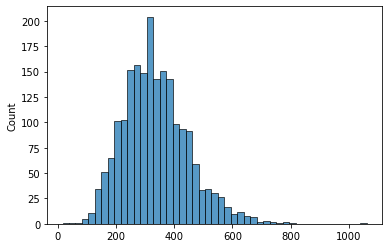

In [7]:
sns.histplot(data=len_list)

<b><br>(vii) To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.</b>

In [23]:
#Replace words by rank
def get_text_sequence(df_complete, df_convert):
#     display(df_complete)
#     display(df_convert)
    df_text_to_seq = pd.DataFrame(columns=['reviews'])
    t = Tokenizer(5001)
    t.fit_on_texts(df_complete['reviews'])
    i=0
    for doc in df_convert["reviews"]:
        sublist = t.texts_to_sequences(doc)
        df_text_to_seq.loc[i,'reviews'] = sublist
        i = i+1
    return df_text_to_seq

df_encoded_train = pd.DataFrame(columns=["reviews"])
df_encoded_test = pd.DataFrame(columns=["reviews"])
i = 0
for doc in df_tokenized_train['reviews']:
    doc = [word.replace(word, str(word_dict[word])) for word in doc.split(' ')]
    df_encoded_train.loc[i,'reviews'] = doc
    i = i+1

    
i = 0
for doc in df_tokenized_test['reviews']:
    doc = [word.replace(word, str(word_dict[word])) for word in doc.split(" ")]
    df_encoded_test.loc[i,'reviews'] = doc
    i = i+1
    
print("Train Encoded rank list is : ")
display(df_encoded_train)
print("Test Encoded rank list is : ")
display(df_encoded_test)


Train Encoded rank list is : 


,reviews
0,"[876, 1025, 85, 24, 734, 1997, 1996, 43, 109, ..."
1,"[1999, 175, 14, 118, 1524, 244, 77, 1957, 4, 2..."
2,"[1934, 1995, 726, 1470, 827, 1957, 1003, 1996,..."
3,"[52, 1922, 4, 1995, 38, 21, 138, 1019, 13, 1, ..."
4,"[66, 1996, 29, 15, 760, 3, 2, 40, 217, 1702, 3..."
...,...
1395,"[1726, 1113, 1631, 306, 116, 35, 964, 227, 144..."
1396,"[46, 1895, 1995, 1996, 19, 605, 1718, 95, 5, 1..."
1397,"[789, 1, 1, 1895, 488, 1318, 1495, 140, 1776, ..."
1398,"[1996, 35, 12, 1995, 1999, 1, 1998, 31, 1917, ..."


Test Encoded rank list is : 


,reviews
0,"[1999, 52, 1995, 1996, 2, 80, 1724, 1957, 1524..."
1,"[1999, 1181, 50, 73, 1998, 1290, 1996, 9, 1412..."
2,"[1994, 1999, 181, 187, 1783, 1, 915, 1524, 292..."
3,"[827, 246, 1010, 1781, 11, 1999, 3, 1998, 823,..."
4,"[1063, 335, 78, 639, 1524, 25, 1957, 47, 17, 1..."
...,...
595,"[28, 1346, 1996, 1524, 1290, 397, 1205, 1770, ..."
596,"[110, 11, 1205, 1770, 1996, 30, 397, 1899, 613..."
597,"[1, 86, 22, 15, 41, 1998, 32, 1, 1999, 305, 10..."
598,"[97, 20, 302, 69, 1724, 1858, 569, 172, 90, 19..."


<b><br>(viii) Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%</b>

In [9]:
#Sort lengths in increasing order and pick 1400th length as 70%
len_list.sort()
L = len_list[1400]
print("Review length %d has 70 percent of the reviews length below it." %(L))

Review length 383 has 70 percent of the reviews length below it.


<b><br>(ix) Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L</b>

In [10]:
from keras.preprocessing.sequence import pad_sequences
df_padded_train = pd.DataFrame(columns=["reviews"])
df_padded_train["reviews"] = pad_sequences(df_encoded_train['reviews'], maxlen=L, padding='post', truncating='post').tolist()
display(df_padded_train)
df_padded_test = pd.DataFrame(columns=["reviews"])
df_padded_test["reviews"] = pad_sequences(df_encoded_test['reviews'], maxlen=L, padding='post', truncating='post').tolist()
display(df_padded_test)

,reviews
0,"[876, 1025, 85, 24, 734, 1997, 1996, 43, 109, ..."
1,"[1999, 175, 14, 118, 1524, 244, 77, 1957, 4, 2..."
2,"[1934, 1995, 726, 1470, 827, 1957, 1003, 1996,..."
3,"[52, 1922, 4, 1995, 38, 21, 138, 1019, 13, 1, ..."
4,"[66, 1996, 29, 15, 760, 3, 2, 40, 217, 1702, 3..."
...,...
1395,"[1726, 1113, 1631, 306, 116, 35, 964, 227, 144..."
1396,"[46, 1895, 1995, 1996, 19, 605, 1718, 95, 5, 1..."
1397,"[789, 1, 1, 1895, 488, 1318, 1495, 140, 1776, ..."
1398,"[1996, 35, 12, 1995, 1999, 1, 1998, 31, 1917, ..."


,reviews
0,"[1999, 52, 1995, 1996, 2, 80, 1724, 1957, 1524..."
1,"[1999, 1181, 50, 73, 1998, 1290, 1996, 9, 1412..."
2,"[1994, 1999, 181, 187, 1783, 1, 915, 1524, 292..."
3,"[827, 246, 1010, 1781, 11, 1999, 3, 1998, 823,..."
4,"[1063, 335, 78, 639, 1524, 25, 1957, 47, 17, 1..."
...,...
595,"[28, 1346, 1996, 1524, 1290, 397, 1205, 1770, ..."
596,"[110, 11, 1205, 1770, 1996, 30, 397, 1899, 613..."
597,"[1, 86, 22, 15, 41, 1998, 32, 1, 1999, 305, 10..."
598,"[97, 20, 302, 69, 1724, 1858, 569, 172, 90, 19..."


<h2><center>Part c) Word Embeddings</center></h2><hr>
<b> 
(i) One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word
embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”. Most deep learning modules (including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like
to use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix.
 
<br>

<b><br>(ii)Flatten the matrix of each document to a vector</b>

In [34]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import text
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import LSTM

vocab_size = 5000
print("The selected L value is : ",L)
# define class labels
labels_train = list(df_tokenized_train['encoding'].values)
padded_list_train = list(df_padded_train['reviews'].values)
labels_test = list(df_tokenized_test['encoding'].values)
padded_list_test = list(df_padded_test['reviews'].values)

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=L))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

The selected L value is :  383
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 383, 32)           160000    
                                                                 
 flatten_12 (Flatten)        (None, 12256)             0         
                                                                 
 dense_17 (Dense)            (None, 1)                 12257     
                                                                 
Total params: 172,257
Trainable params: 172,257
Non-trainable params: 0
_________________________________________________________________
None


<h2><center>Part d) Multi-Layer Perceptron</center></h2><hr>
<b> 
(i) Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10
<br><br>

In [31]:
# define the keras model
# The model expects rows of data with 8 variables (the input_dim=8 argument)
# The first hidden layer has 12 nodes and uses the relu activation function.
# The second hidden layer has 8 nodes and uses the relu activation function.
# The output layer has one node and uses the sigmoid activation function.
modelMLP = Sequential()
modelMLP.add(Embedding(vocab_size, 32, input_length=L))
modelMLP.add(Flatten())
modelMLP.add(Dense(50, input_dim=8, activation='relu',name = "layer1"))
modelMLP.add(Dropout(0.2))
modelMLP.add(Dense(50, activation='relu', name = "layer2"))
modelMLP.add(Dropout(0.5))
modelMLP.add(Dense(50, activation='relu', name = "layer3"))
modelMLP.add(Dense(1, activation='sigmoid'))
modelMLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelMLP.fit(padded_list_train, labels_train, epochs=2,verbose=0, batch_size=10)

<b><br>(ii)Report the train and test accuracies of this model.</b>

In [13]:
loss, accuracy = modelMLP.evaluate(np.array(padded_list_train), np.array(labels_train), verbose=0)
print('Train Accuracy: %f' % (accuracy*100))
loss, accuracy = modelMLP.evaluate(np.array(padded_list_test), np.array(labels_test), verbose=0)
print('Test Accuracy: %f' % (accuracy*100))

Train Accuracy: 95.642859
Test Accuracy: 50.333333


<h2><center>Part e) One-Dimensional Convolutional Neural Network</center></h2><hr>
<b>Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.
<br><br>(i) After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.


In [14]:
modelCNN = Sequential()
modelCNN.add(Embedding(vocab_size, 32, input_length=L))
modelCNN.add(layers.Conv1D(32, 3))
modelCNN.add(layers.MaxPooling1D(2,2))
modelCNN.add(Flatten())

modelCNN.add(Dense(50, activation='relu',name = "layer1"))
modelCNN.add(Dropout(0.2))
modelCNN.add(Dense(50, activation='relu', name = "layer2"))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(50, activation='relu', name = "layer3"))
modelCNN.add(Dense(1, activation='sigmoid'))
modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelCNN.fit(padded_list_train, labels_train, epochs=2,verbose=0, batch_size=10)

<b><br>(ii)Report the train and test accuracies of this model.</b>

In [15]:
loss, accuracy = modelCNN.evaluate(np.array(padded_list_train), np.array(labels_train), verbose=0)
print('Train Accuracy: %f' % (accuracy*100))
loss, accuracy = modelCNN.evaluate(np.array(padded_list_test), np.array(labels_test), verbose=0)
print('Test Accuracy: %f' % (accuracy*100))

Train Accuracy: 82.428569
Test Accuracy: 57.166666


<h2><center>Part f) Long Short-Term Memory Recurrent Neural Network</center></h2><hr>
<b>The structure of the LSTM we are going to use is shown in the following figure.
(i)Each word is represented to LSTM as a vector of 32 elements and the LSTM
is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both
LSTM and the dense layer. Train the model using 10-50 epochs and batch
size of 10
<br>

In [20]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(vocab_size, 32, input_length=L))
modelLSTM.add(LSTM(32))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(Dense(256, activation='relu'))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(Dense(1, activation='sigmoid'))
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
modelLSTM.fit(padded_list_train, labels_train, validation_data=(padded_list_test, labels_test), epochs=10, batch_size=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 383, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 12256)             0         
                                                                 
 dense (Dense)               (None, 1)                 12257     
                                                                 
Total params: 172,257
Trainable params: 172,257
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
140/140 [==============================] - 16s 102ms/step - loss: 0.6925 - accuracy: 0.5214 - val_loss: 0.6917 - val_accuracy: 0.5250
Epoch 2/10
140/140 [==============================] - 14s 103ms/step - loss: 0.6787 - accuracy: 0.5664 - val_loss: 0.6947 - val_accuracy: 0.5333
Epoch 3/10
140/140 

<b><br>(ii)Report the train and test accuracies of this model.</b>

In [21]:
loss, accuracy = modelLSTM.evaluate(np.array(padded_list_train), np.array(labels_train), verbose=0)
print('Train Accuracy: %f' % (accuracy*100))
loss, accuracy = modelLSTM.evaluate(np.array(padded_list_test), np.array(labels_test), verbose=0)
print('Test Accuracy: %f' % (accuracy*100))

Train Accuracy: 69.000000
Test Accuracy: 53.166670
